In [1]:
print("hello")

hello


In [2]:
import nltk

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [26]:
train = pd.read_csv(r'C:\Users\Hp\Desktop\Python\NLP\COVID19Tweet-master\train.tsv', sep='\t')
val = pd.read_csv(r'C:\Users\Hp\Desktop\Python\NLP\COVID19Tweet-master\valid.tsv', sep='\t')
test = pd.read_csv(r'C:\Users\Hp\Desktop\Python\NLP\COVID19Tweet-master\unlabeled_test_with_noise.tsv', sep='\t')
print(train.shape)
print(val.shape)
print(test.shape)


(6936, 3)
(1000, 3)
(12000, 2)


In [29]:
val.head()

,Id,Text,Label
0,1241728922192142336,For those saying Pakistan isn’t Italy; After 3...,UNINFORMATIVE
1,1235713405992030209,Second case DR 🇩🇴 The Canadian woman has not b...,INFORMATIVE
2,1245941302367305728,Kill Chain: the cyber war on America's electio...,UNINFORMATIVE
3,1245913002840391681,Town hosts FIRST #Virtual #TownCouncil meeting...,UNINFORMATIVE
4,1240543259299987457,Report suggested that the actual number of und...,UNINFORMATIVE


In [ ]:
# Edit val and test by adding labels 
# okay \n separation is giving me 7000 training examples which is what I need but \t separated gives 6936? 

In [25]:
train.isnull().any()


Id       False
Text     False
Label    False
dtype: bool

In [31]:
train[train['Label'] == 'UNINFORMATIVE'].head(10)

,Id,Text,Label
4,1239673817552879619,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE
5,1240790181860409344,Democrats somehow managed to fight ebola witho...,UNINFORMATIVE
8,1236363091002011649,“Coronavirus impact: Close Taj Mahal till Marc...,UNINFORMATIVE
9,1245725162957242368,Dear @USER In #COVID2019 case...give tools &am...,UNINFORMATIVE
10,1240721152076546049,Los Angeles is now the county with the highest...,UNINFORMATIVE
12,1242799513619664896,Watch Live !! Discussion on #COVID19 with Unio...,UNINFORMATIVE
13,1251122786225045504,Coronavirus cases in Africa could shoot up fro...,UNINFORMATIVE
14,1241449715654410240,“According to their report if you come in cont...,UNINFORMATIVE
15,1241173819693252608,Senators urge Jeff Bezos to give Amazon wareho...,UNINFORMATIVE
20,1244684987351404551,I think the President Cyril Ramaphosa should a...,UNINFORMATIVE


In [32]:
train[train['Label'] == 'INFORMATIVE'].head(10)

,Id,Text,Label
0,1241490299215634434,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,1245916400981381130,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,1241132432402849793,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,1236107253666607104,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
6,1249147011003187200,"as number of #COVID19 deaths surpassed 100,000...",INFORMATIVE
7,1241533144802758656,"@USER @USER 1 week ago today (March 14), there...",INFORMATIVE
11,1246739551227387905,#COVID19 Updates. #SothSudan's fist positive p...,INFORMATIVE
16,1245311331579899906,A @USER professor has died after contracting #...,INFORMATIVE
17,1240108182409601024,EU imposes entry ban for 30 days while death t...,INFORMATIVE
18,1248321628808728576,إِنَّا لِلّهِ وَإِنَّـا إِلَيْهِ رَاجِعُونَ Sa...,INFORMATIVE


UNINFORMATIVE    3663
INFORMATIVE      3273
Name: Label, dtype: int64


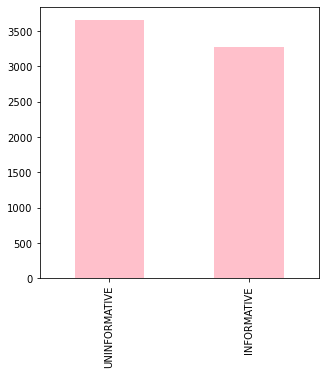

In [40]:
train['Label'].value_counts().plot.bar(color = 'pink', figsize = (5, 5)) # pandas function 
print(train['Label'].value_counts())

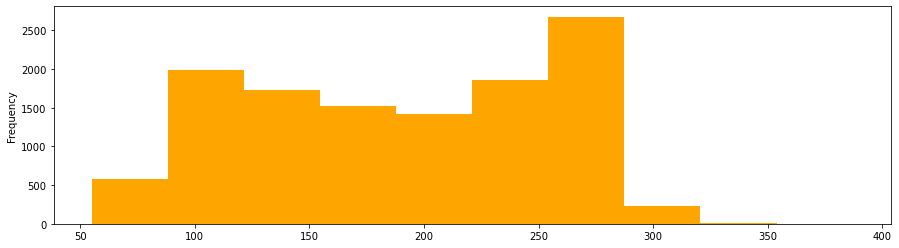

In [46]:
# checking the distribution of tweets in the data

#length_train = train['Text'].str.len().plot.hist(color = 'pink', figsize = (15, 4))
length_test = test['Text'].str.len().plot.hist(color = 'orange', figsize = (15, 4))

In [48]:
print(test['Text'].str.len())

0         90
1        259
2        181
3        195
4        212
        ... 
11995     92
11996     79
11997    222
11998    253
11999    280
Name: Text, Length: 12000, dtype: int64


In [49]:
train.groupby('Label').describe()

Id                                                          \
                count          mean           std           min           25%   
Label                                                                           
INFORMATIVE    3273.0  1.242323e+18  4.337500e+15  1.235405e+18  1.240011e+18   
UNINFORMATIVE  3663.0  1.242879e+18  4.269091e+15  1.235396e+18  1.240711e+18   

                                                         
                        50%           75%           max  
Label                                                    
INFORMATIVE    1.241628e+18  1.245831e+18  1.252189e+18  
UNINFORMATIVE  1.242864e+18  1.245915e+18  1.252198e+18